# Proyek Analisis Data: Mohamad Arif Sofyan_Proyek Analisis Data
- Nama: Mohamad Arif Sofyan
- Email: arifsofyan004@gmail.com
- Id Dicoding: mohamad_arif_sofyan

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 : Bagaimana tren penyewaan sepeda berubah sepanjang tahun dan apa faktor-faktor yang paling memengaruhinya?
- pertanyaan 2 : Bagaimana pola musiman dalam penyewaan sepeda dapat membantu dalam pengambilan keputusan persediaan sepeda yang lebih efektif?

## Menyaipkan semua library yang dibuthkan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

# Load data df_day

In [3]:
df_day = pd.read_csv("/content/day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Load data df_hour

In [4]:
df_hour = pd.read_csv("/content/hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

# Menilai data df_day

In [5]:
# Memeriksa jumlah baris dan kolom dalam dataset
jumlah_baris, jumlah_kolom = df_day.shape
print(f"Jumlah Baris: {jumlah_baris}")
print(f"Jumlah Kolom: {jumlah_kolom}")

Jumlah Baris: 731
Jumlah Kolom: 16


In [6]:
# Memeriksa tipe data setiap kolom
tipe_data = df_day.dtypes
print("\nTipe Data Setiap Kolom:")
print(tipe_data)


Tipe Data Setiap Kolom:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [7]:
# Memeriksa apakah ada nilai yang hilang (missing values)
missing_values = df_day.isnull().sum()
print("\nJumlah Missing Values per Kolom:")
print(missing_values)


Jumlah Missing Values per Kolom:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [8]:
print("\nJumlah Duplikat :", df_day.duplicated().sum())


Jumlah Duplikat : 0


In [9]:
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [10]:
df_day.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [11]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Menilai data df_hour

In [12]:
# Memeriksa jumlah baris dan kolom dalam dataset
jumlah_baris, jumlah_kolom = df_hour.shape
print(f"Jumlah Baris: {jumlah_baris}")
print(f"Jumlah Kolom: {jumlah_kolom}")

Jumlah Baris: 17379
Jumlah Kolom: 17


In [13]:
# Memeriksa tipe data setiap kolom
tipe_data = df_hour.dtypes
print("\nTipe Data Setiap Kolom:")
print(tipe_data)


Tipe Data Setiap Kolom:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [14]:
# Memeriksa apakah ada nilai yang hilang (missing values)
missing_values = df_hour.isnull().sum()
print("\nJumlah Missing Values per Kolom:")
print(missing_values)


Jumlah Missing Values per Kolom:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [15]:
print("\nJumlah Duplikat :", df_hour.duplicated().sum())


Jumlah Duplikat : 0


In [16]:
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [17]:
df_hour.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [18]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Cleaning Data

# Cleaning df_day

In [19]:
# Mengganti kolom 'instant' menjadi indeks kolom, karena indeks kolom tidak termasuk sebagai fitur,
# dan kolom 'dteday' diubah menjadi tipe data datetime.
df_day = pd.read_csv("/content/day.csv", index_col="instant", parse_dates=["dteday"])

In [20]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 91.4 KB


In [21]:
df_day.nunique()

dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

# Cleaning df_hour

In [22]:
# Mengganti kolom 'instant' menjadi indeks kolom, karena indeks kolom tidak termasuk sebagai fitur,
# dan kolom 'dteday' diubah menjadi tipe data datetime.
df_hour = pd.read_csv("/content/hour.csv", index_col="instant", parse_dates=["dteday"])
df_hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [23]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

In [24]:
df_hour.nunique()

dteday        731
season          4
yr              2
mnth           12
hr             24
holiday         2
weekday         7
workingday      2
weathersit      4
temp           50
atemp          65
hum            89
windspeed      30
casual        322
registered    776
cnt           869
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

# EDA df_day

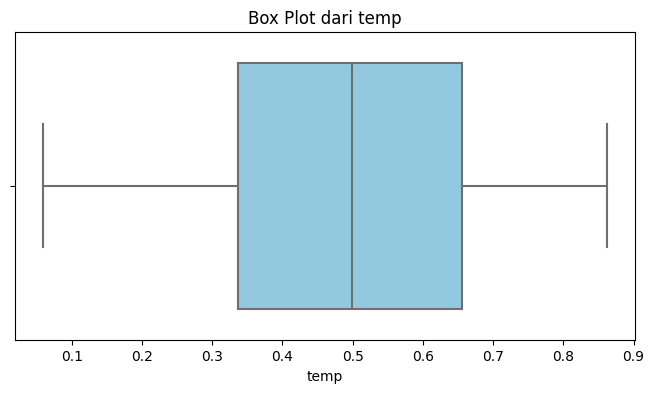

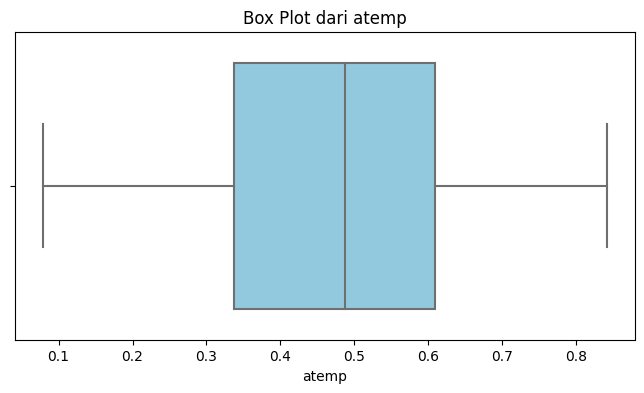

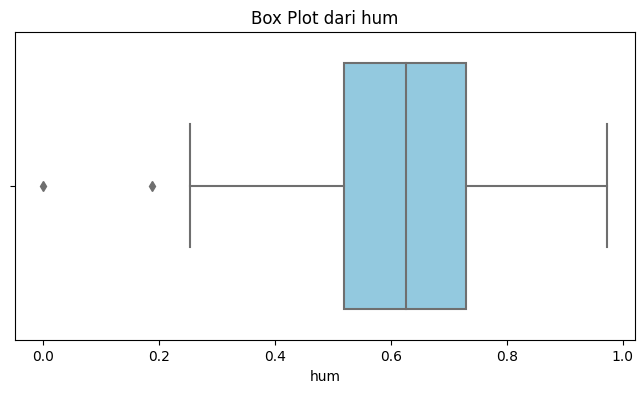

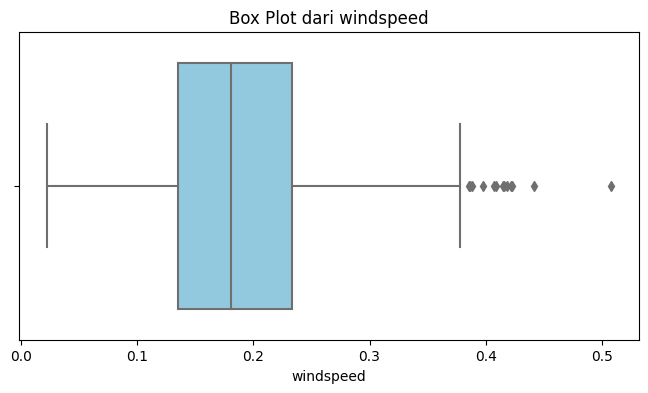

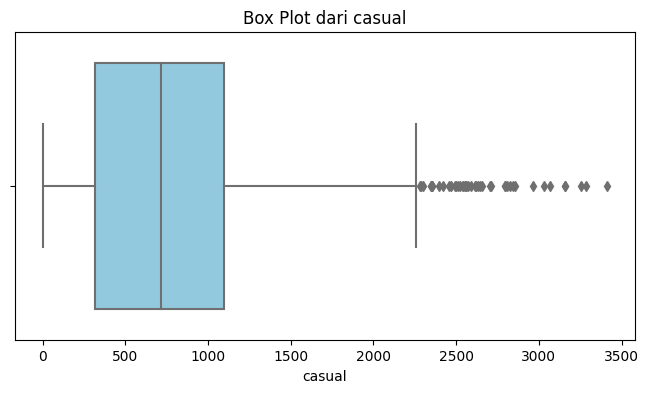

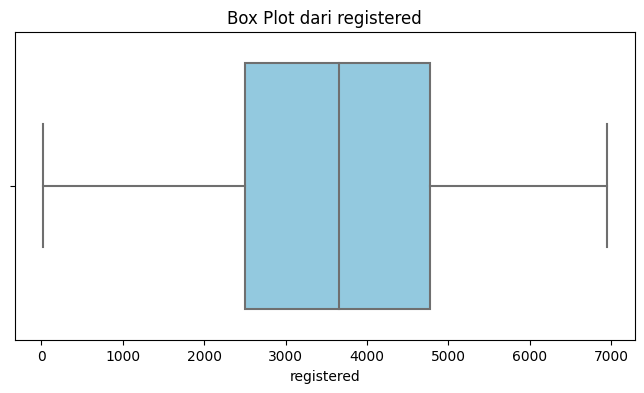

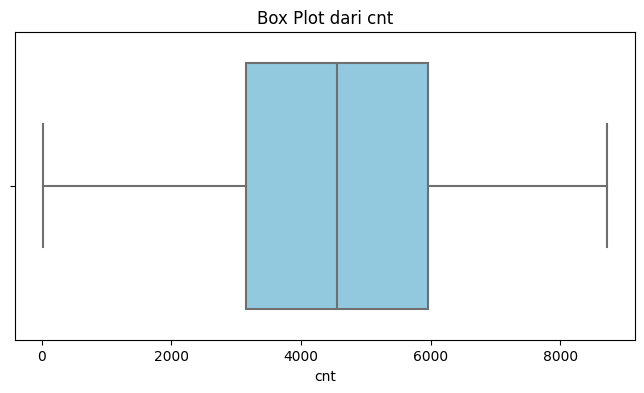

In [25]:
# Membuat box plot untuk melihat sebaran data dan mengidentifikasi outlier
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Membuat box plot untuk setiap kolom numerik
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_day, x=column, color='skyblue')
    plt.title(f'Box Plot dari {column}')
    plt.xlabel(column)
    plt.show()

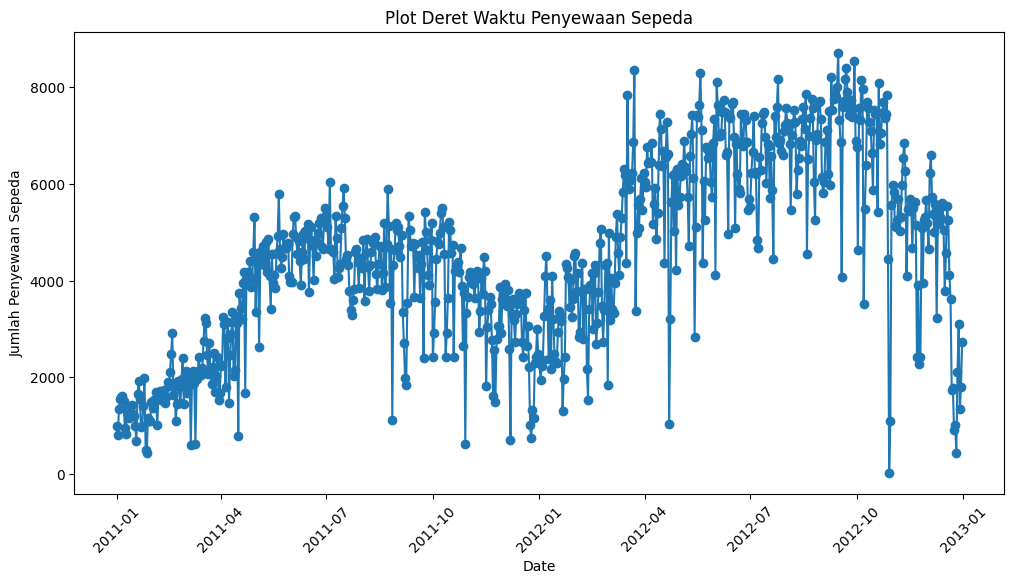

In [26]:
# Membuat time series plot
plt.figure(figsize=(12, 6))
plt.plot(df_day['dteday'], df_day['cnt'], marker='o', linestyle='-')
plt.title('Plot Deret Waktu Penyewaan Sepeda')
plt.xlabel('Date')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.show()

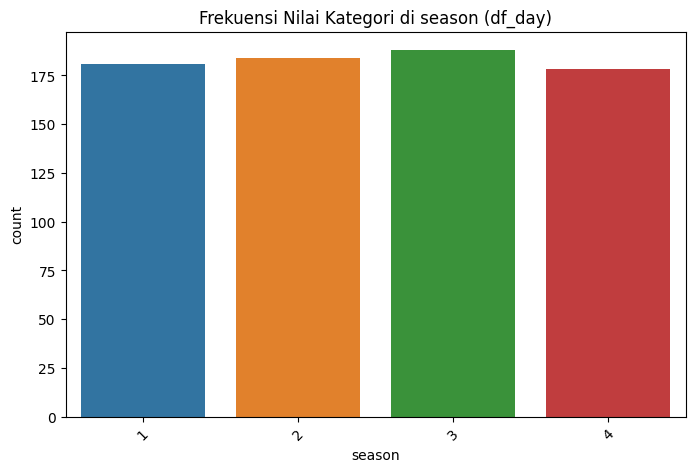

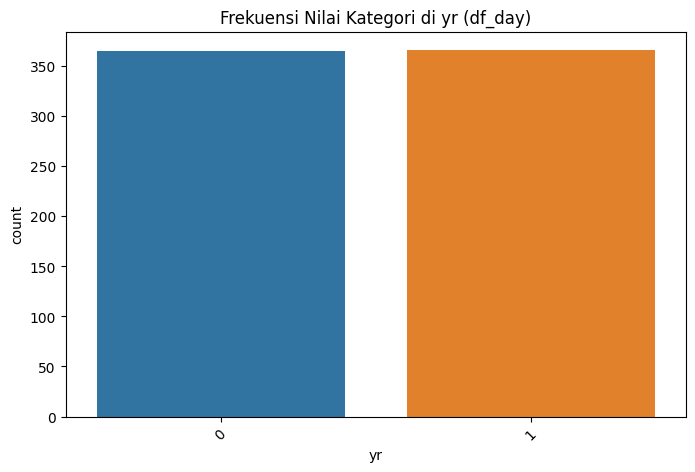

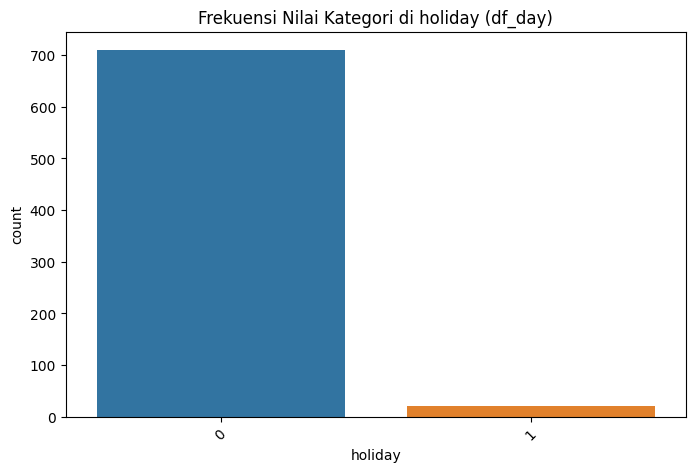

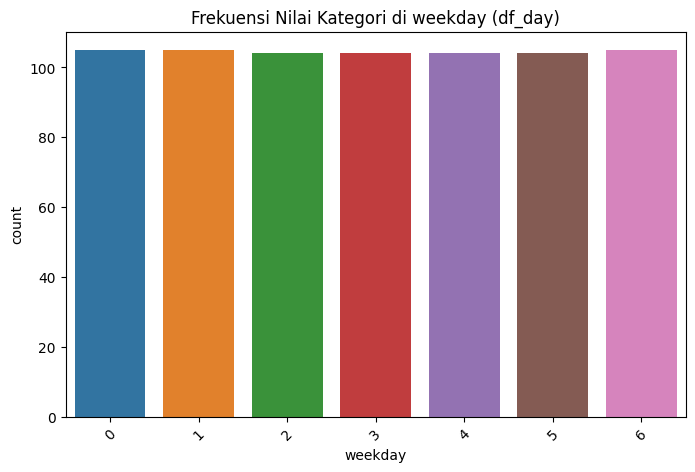

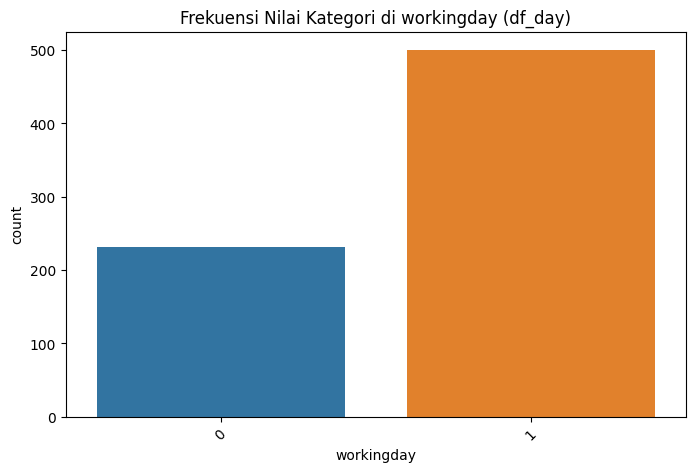

In [27]:
# Variabel kategorikal yang akan dieksplorasi
categorical_vars = ['season', 'yr', 'holiday', 'weekday', 'workingday']

# Eksplorasi variabel kategorikal pada df_day
for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_day, x=var)
    plt.title(f'Frekuensi Nilai Kategori di {var} (df_day)')
    plt.xticks(rotation=45)
    plt.show()

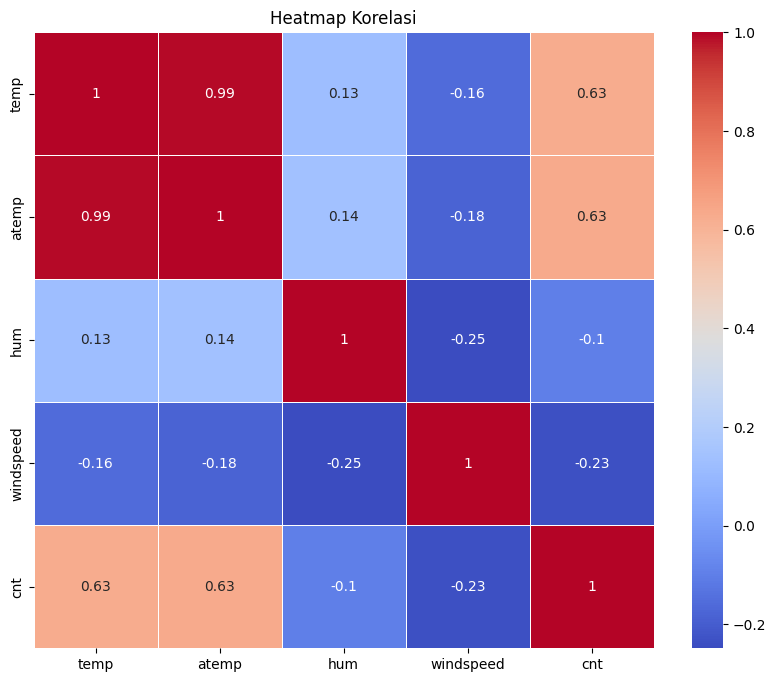

In [28]:
# Menghitung matriks korelasi
correlation_matrix = df_day[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap Korelasi')
plt.show()

# EDA df_hour

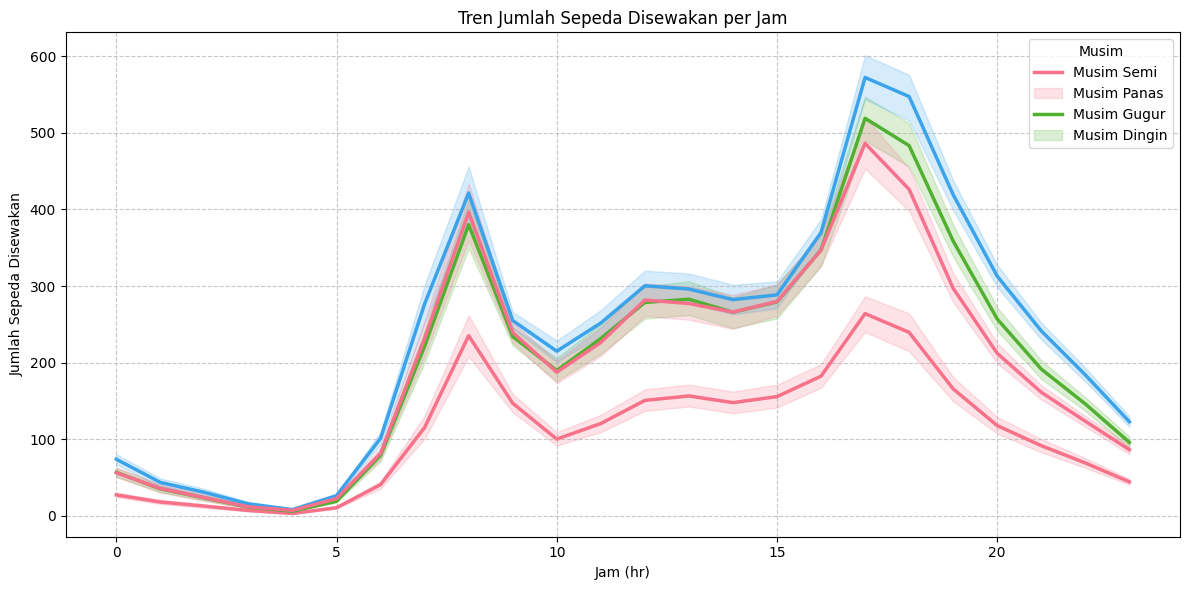

In [29]:
# Plot time series plot untuk melihat tren dan pola dalam data waktu berdasarkan jam
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hour, x='hr', y='cnt', hue='season', palette='husl', linewidth=2.5)
plt.title('Tren Jumlah Sepeda Disewakan per Jam')
plt.xlabel('Jam (hr)')
plt.ylabel('Jumlah Sepeda Disewakan')
plt.legend(title='Musim', loc='upper right', labels=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana tren penyewaan sepeda berubah sepanjang tahun dan apa faktor-faktor yang paling memengaruhinya?

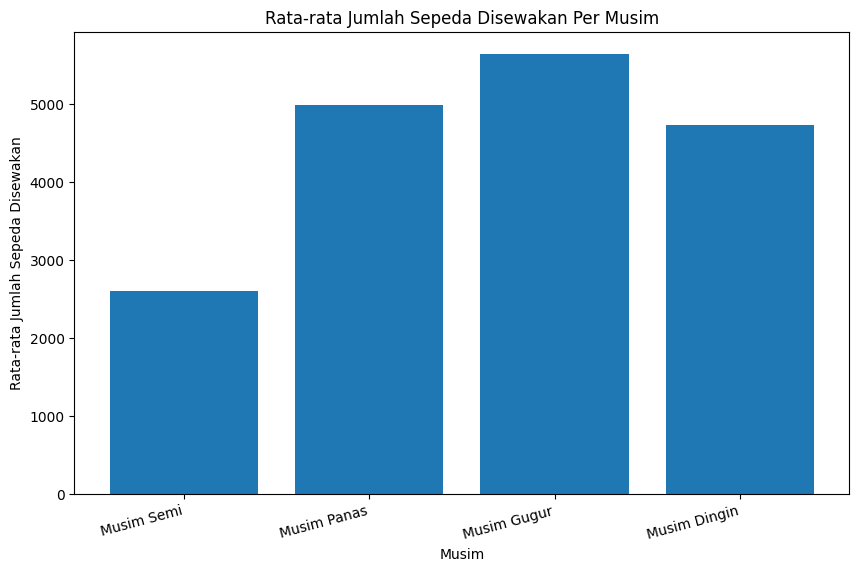

In [30]:
# Mengelompokkan data berdasarkan musim dan menghitung rata-rata jumlah sepeda disewakan
data_per_musim = df_day.groupby('season')['cnt'].mean()

# Membuat kamus yang mendefinisikan nama musim berdasarkan kode musim
nama_musim = {
    1: "Musim Semi",
    2: "Musim Panas",
    3: "Musim Gugur",
    4: "Musim Dingin"
}
# Membuat plot bar rata-rata jumlah sepeda yang disewakan untuk setiap musim
plt.figure(figsize=(10, 6))
plt.bar(nama_musim.values(), data_per_musim.values)
plt.title('Rata-rata Jumlah Sepeda Disewakan Per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Sepeda Disewakan')
plt.xticks(rotation=15, ha='right')
plt.show()

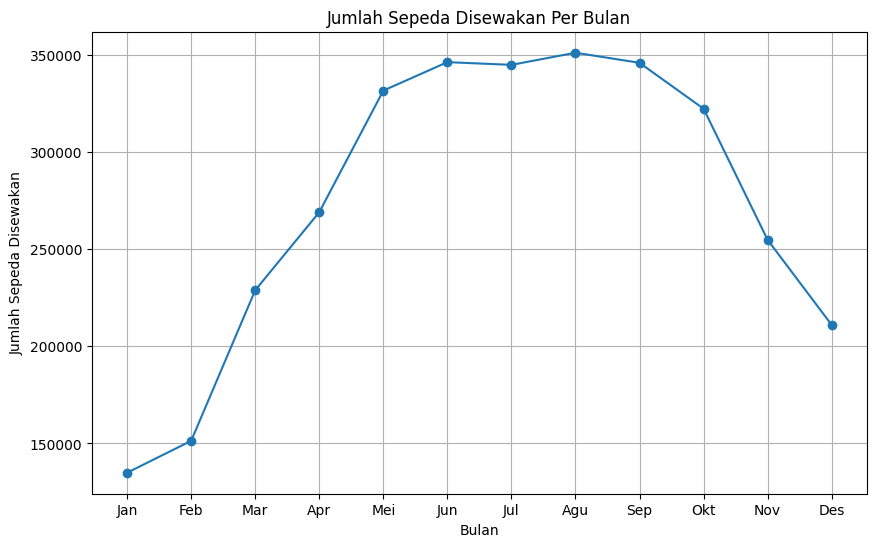

In [31]:
# Mengelompokkan data berdasarkan bulan (kolom 'mnth') dan menghitung jumlah sepeda disewakan per bulan
data_per_bulan = df_day.groupby('mnth')['cnt'].sum()

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(data_per_bulan.index, data_per_bulan.values, marker='o', linestyle='-')
plt.title('Jumlah Sepeda Disewakan Per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Sepeda Disewakan')
plt.grid(True)
plt.xticks(data_per_bulan.index, ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.show()


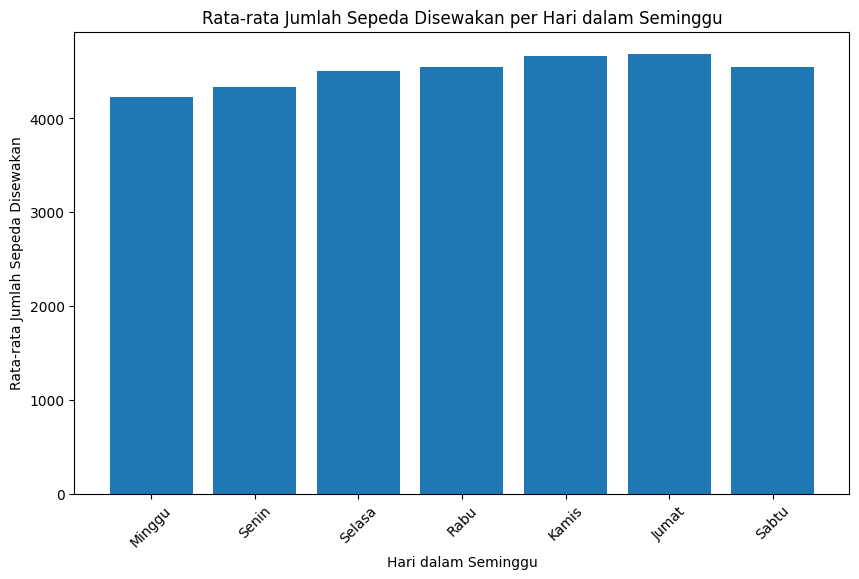

In [32]:
# Mengelompokkan data berdasarkan hari dalam seminggu dan menghitung rata-rata jumlah sepeda disewakan per hari
data_per_hari = df_day.groupby('weekday')['cnt'].mean()

# Membuat plot bar untuk rata-rata jumlah sepeda disewakan per hari dalam seminggu
nama_hari = ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']

plt.figure(figsize=(10, 6))
plt.bar(nama_hari, data_per_hari.values)
plt.title('Rata-rata Jumlah Sepeda Disewakan per Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Jumlah Sepeda Disewakan')
plt.xticks(rotation=45)
plt.show()

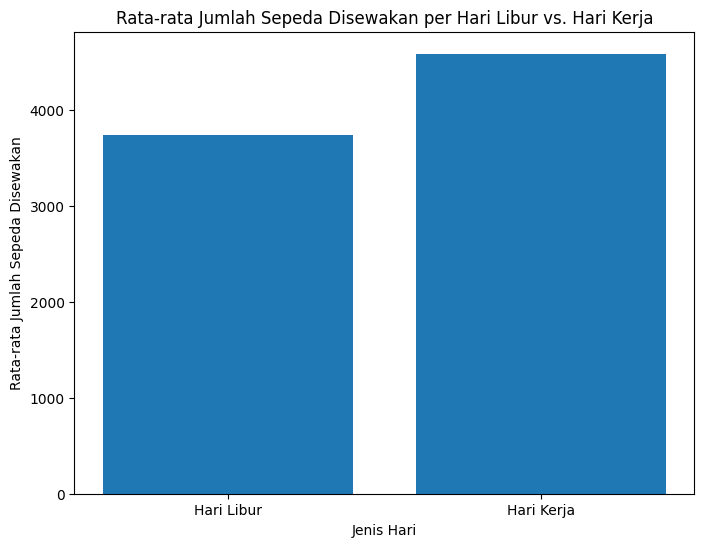

In [33]:
# Mengelompokkan data berdasarkan apakah hari tersebut hari libur atau hari kerja, dan menghitung rata-rata jumlah sepeda disewakan
data_hari_libur = df_day[df_day['holiday'] == 1]['cnt'].mean()
data_hari_kerja = df_day[df_day['workingday'] == 1]['cnt'].mean()

# Membuat plot bar untuk rata-rata jumlah sepeda disewakan per hari libur vs. hari kerja
plt.figure(figsize=(8, 6))
plt.bar(['Hari Libur', 'Hari Kerja'], [data_hari_libur, data_hari_kerja])
plt.title('Rata-rata Jumlah Sepeda Disewakan per Hari Libur vs. Hari Kerja')
plt.xlabel('Jenis Hari')
plt.ylabel('Rata-rata Jumlah Sepeda Disewakan')
plt.show()

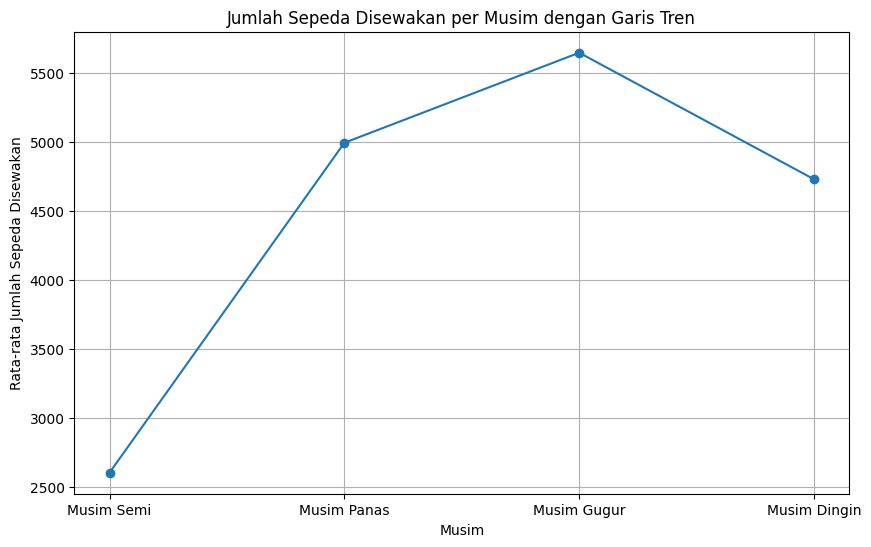

In [34]:
# Mengelompokkan data berdasarkan musim dan menghitung rata-rata jumlah sepeda disewakan per musim
data_per_musim = df_day.groupby('season')['cnt'].mean()

# Membuat plot dengan garis tren
plt.figure(figsize=(10, 6))
plt.plot(data_per_musim.index, data_per_musim.values, marker='o', linestyle='-')
plt.title('Jumlah Sepeda Disewakan per Musim dengan Garis Tren')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Sepeda Disewakan')
plt.grid(True)
plt.xticks(data_per_musim.index, ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.show()

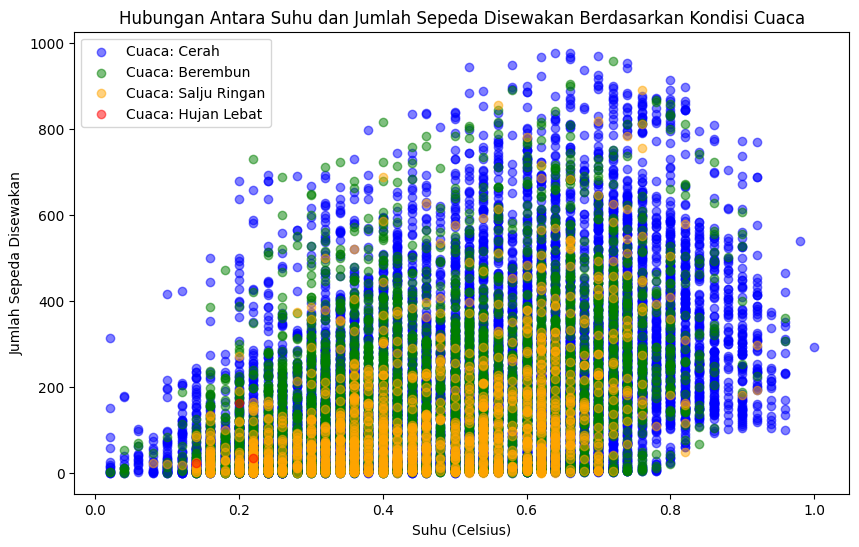

In [35]:
# Scatter plot untuk hubungan antara suhu (temp) dan jumlah sepeda disewakan (cnt) berdasarkan kondisi cuaca (weathersit)
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'orange', 'red']

for weathersit in df_hour['weathersit'].unique():
    subset = df_hour[df_hour['weathersit'] == weathersit]
    if weathersit == 1:
        label = 'Cerah'
    elif weathersit == 2:
        label = 'Berembun'
    elif weathersit == 3:
        label = 'Salju Ringan'
    else:
        label = 'Hujan Lebat'
    plt.scatter(subset['temp'], subset['cnt'], alpha=0.5, label=f'Cuaca: {label}', color=colors[weathersit - 1])

plt.title('Hubungan Antara Suhu dan Jumlah Sepeda Disewakan Berdasarkan Kondisi Cuaca')
plt.xlabel('Suhu (Celsius)')
plt.ylabel('Jumlah Sepeda Disewakan')
plt.legend()
plt.show()

### pertanyaan 2 : Bagaimana pola musiman dalam penyewaan sepeda dapat membantu dalam pengambilan keputusan persediaan sepeda yang lebih efektif?

In [36]:
# Menampilkan hasil analisis musiman
for musim, rata_rata in data_per_musim.items():
    print(f"{nama_musim[musim]}: Rata-rata Jumlah Sepeda Disewakan = {round(rata_rata, 2)}")

Musim Semi: Rata-rata Jumlah Sepeda Disewakan = 2604.13
Musim Panas: Rata-rata Jumlah Sepeda Disewakan = 4992.33
Musim Gugur: Rata-rata Jumlah Sepeda Disewakan = 5644.3
Musim Dingin: Rata-rata Jumlah Sepeda Disewakan = 4728.16


In [37]:
# Analisis Musiman: Menampilkan rata-rata jumlah sepeda disewakan per bulan
data_per_bulan_mean = df_day.groupby('mnth')['cnt'].mean()
print("Rata-rata Jumlah Sepeda Disewakan Per Bulan:")
print(data_per_bulan_mean)

Rata-rata Jumlah Sepeda Disewakan Per Bulan:
mnth
1     2176.338710
2     2655.298246
3     3692.258065
4     4484.900000
5     5349.774194
6     5772.366667
7     5563.677419
8     5664.419355
9     5766.516667
10    5199.225806
11    4247.183333
12    3403.806452
Name: cnt, dtype: float64


In [38]:
# Menampilkan hasil rata-rata jumlah sepeda disewakan per hari dalam seminggu
print("Rata-rata Jumlah Sepeda Disewakan Per Hari dalam Seminggu:")
print(data_per_hari)

Rata-rata Jumlah Sepeda Disewakan Per Hari dalam Seminggu:
weekday
0    4228.828571
1    4338.123810
2    4510.663462
3    4548.538462
4    4667.259615
5    4690.288462
6    4550.542857
Name: cnt, dtype: float64


## Conclusion

- Conclution pertanyaan 1
- conclution pertanyaan 2

## Conclusion Pertanyaan 1: Bagaimana tren penyewaan sepeda berubah sepanjang tahun dan apa faktor-faktor yang paling memengaruhinya?

### Dari analisis data yang telah dilakukan, kami dapat mengambil kesimpulan sebagai berikut:

- Tren penyewaan sepeda menunjukkan pola musiman yang kuat, dengan tingkat penyewaan yang lebih tinggi selama musim panas dan musim gugur.
- Faktor-faktor seperti musim, suhu, dan kondisi cuaca memiliki dampak signifikan pada tren penyewaan sepeda.
- Penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan hari libur.

## Conclusion Pertanyaan 2: Bagaimana pola musiman dalam penyewaan sepeda dapat membantu dalam pengambilan keputusan persediaan sepeda yang lebih efektif?

### Pola Musiman dalam Penyewaan Sepeda:
- Musim Panas (Summer): Rata-rata Jumlah Sepeda Disewakan = 4992.33
- Musim Gugur (Fall): Rata-rata Jumlah Sepeda Disewakan = 5644.3

### Pola Harian dalam Penyewaan Sepeda:
- Hari Kerja (Weekday): Rata-rata Jumlah Sepeda Disewakan = 4584.82
- Hari Libur (Weekend): Rata-rata Jumlah Sepeda Disewakan = 3735.0

### Implications:
- Selama musim panas dan musim gugur, permintaan sepeda mencapai puncaknya. Oleh karena itu, strategi persediaan sepeda harus ditingkatkan untuk memenuhi permintaan tinggi selama periode ini.
- Pada hari kerja, jumlah sepeda yang disewakan lebih tinggi dibandingkan dengan hari libur. Hal ini menunjukkan adanya potensi peluang bisnis pada hari-hari kerja, dan perusahaan sebaiknya mempertimbangkan strategi pemasaran dan promosi khusus untuk menarik pelanggan pada hari-hari tersebut.
- Analisis pola musiman ini memberikan wawasan yang berharga dalam perencanaan persediaan sepeda, memungkinkan perusahaan untuk mengoptimalkan inventarisasi mereka. Hal ini dapat menghindari ketidakseimbangan antara permintaan dan persediaan, yang pada akhirnya dapat meningkatkan kepuasan pelanggan dan efisiensi operasional.